In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [155]:
customerData = pd.read_csv("/content/customer_segmentation_data.csv")

customerData.shape

(53503, 20)

In [156]:
customerData.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [157]:
customerData.tail()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5
53502,62125,20,Male,Divorced,Doctorate,Daman and Diu,Salesperson,136632,policy2,10/14/2022,Phone,policy1,743262,4499,Group,Text,In-Person Meeting,Evening,German,Segment2


In [158]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [159]:
customerData.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


In [160]:
customerData.isnull()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53499,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [161]:
customerData.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Marital Status,0
Education Level,0
Geographic Information,0
Occupation,0
Income Level,0
Behavioral Data,0
Purchase History,0


In [162]:
customerData.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Marital Status,object
Education Level,object
Geographic Information,object
Occupation,object
Income Level,int64
Behavioral Data,object
Purchase History,object


In [163]:
customerData.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')

In [164]:
catogories = ['Occupation', 'Preferred Language' , 'Preferred Contact Time' , 'Policy Type' , 'Segmentation Group' , 'Preferred Communication Channel', 'Interactions with Customer Service']

for i in catogories:
  customerData[i] = customerData[i].astype('category')

In [165]:
customerData['Purchase History'] = pd.to_datetime(customerData['Purchase History'] , format= 'mixed')

In [166]:
customerData.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Marital Status,object
Education Level,object
Geographic Information,object
Occupation,category
Income Level,int64
Behavioral Data,object
Purchase History,datetime64[ns]


In [167]:
customerData.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Marital Status,0
Education Level,0
Geographic Information,0
Occupation,0
Income Level,0
Behavioral Data,0
Purchase History,0


In [168]:
customerData.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
53498,False
53499,False
53500,False
53501,False


In [169]:
customerData.duplicated().sum()

0

In [170]:
customerData

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,2018-04-10,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,2018-11-06,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,2021-06-05,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,2018-09-02,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,2018-09-10,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,2019-01-01,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,2021-05-18,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,2018-11-27,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,2021-06-04,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


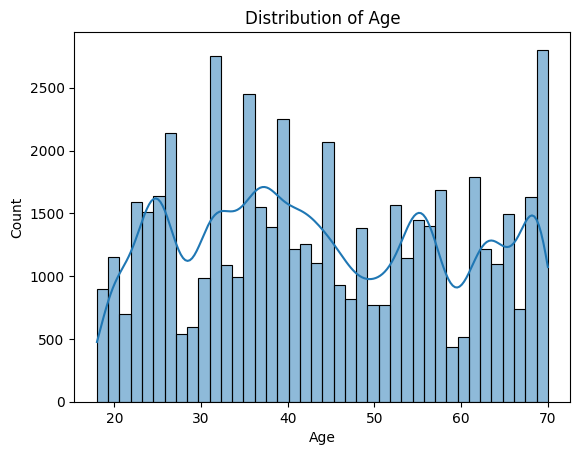

In [171]:
sns.histplot(customerData['Age'], bins=40, kde=True)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

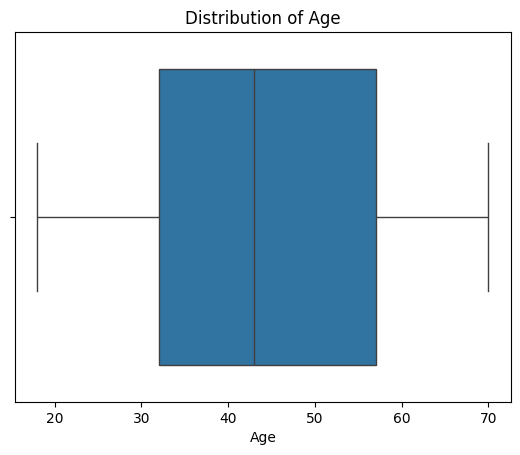

In [172]:
sns.boxplot(x = 'Age' , data=customerData )

plt.title('Distribution of Age')
plt.xlabel('Age')

plt.show()

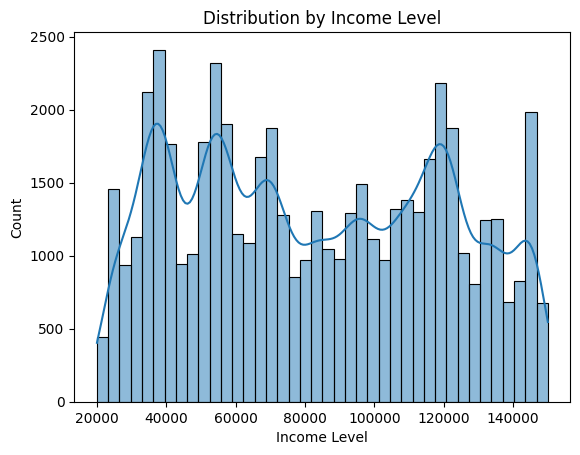

In [173]:
sns.histplot(x = customerData['Income Level'] ,  bins = 40 , kde =True )

plt.title("Distribution by Income Level")
plt.xlabel("Income Level")
plt.ylabel('Count')

plt.show()

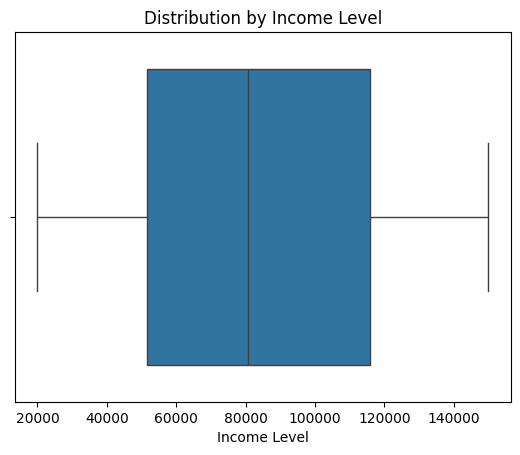

In [174]:
sns.boxplot(x=customerData['Income Level'])

plt.title("Distribution by Income Level")
plt.xlabel("Income Level")

plt.show()

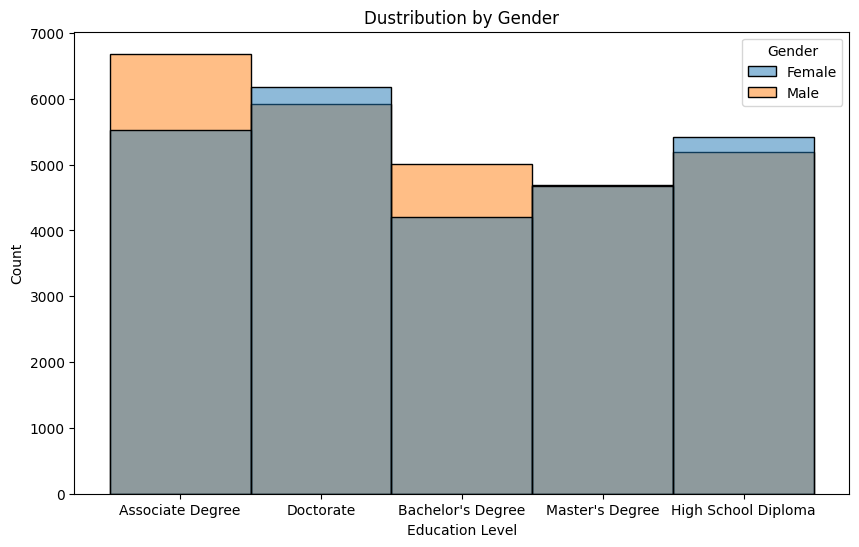

In [175]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'Education Level' , hue= 'Gender' , data=customerData ,legend = True  )

plt.title('Dustribution by Gender')
plt.show()

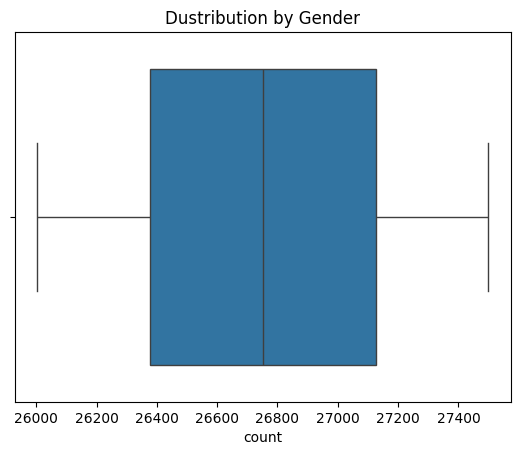

In [176]:
sns.boxplot(x = customerData['Gender'].value_counts()  , data = customerData , legend= True , )

plt.title('Dustribution by Gender')
plt.show()

In [177]:
customerData['Age'].skew()


0.11604567902069254

In [178]:
customerData['Income Level'].skew()

0.10940232024467507

In [179]:
customerData['Coverage Amount']

,Coverage Amount
0,366603
1,780236
2,773926
3,787815
4,366506
...,...
53498,586401
53499,637733
53500,631057
53501,730385


In [180]:
customerData['Premium Amount']

,Premium Amount
0,2749
1,1966
2,4413
3,4342
4,1276
...,...
53498,4404
53499,1285
53500,4407
53501,4482


In [181]:
customerData['Spending Score'] = customerData['Coverage Amount'] + customerData['Premium Amount']

customerData['Spending Score']

,Spending Score
0,369352
1,782202
2,778339
3,792157
4,367782
...,...
53498,590805
53499,639018
53500,635464
53501,734867


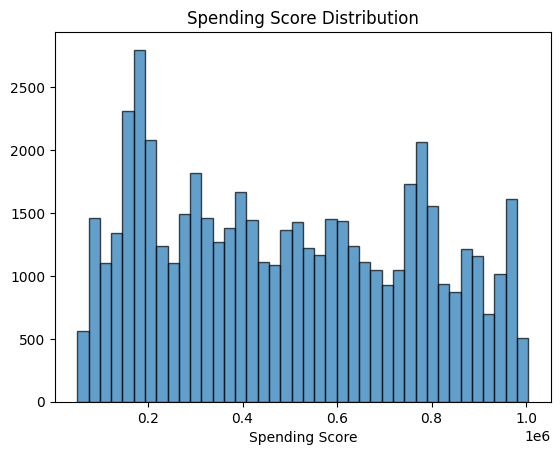

In [182]:
plt.hist(x = customerData['Spending Score'] , alpha = 0.7 , edgecolor = 'black' , bins = 40)

plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')

plt.show()

In [183]:
customerData['Purchase History']

,Purchase History
0,2018-04-10
1,2018-11-06
2,2021-06-05
3,2018-09-02
4,2018-09-10
...,...
53498,2019-01-01
53499,2021-05-18
53500,2018-11-27
53501,2021-06-04


In [184]:
customerData['Purchase Frequency'] = customerData.groupby('Customer ID')['Purchase History'].transform('count')

customerData['Purchase Frequency']

,Purchase Frequency
0,1
1,1
2,2
3,1
4,4
...,...
53498,3
53499,2
53500,1
53501,1


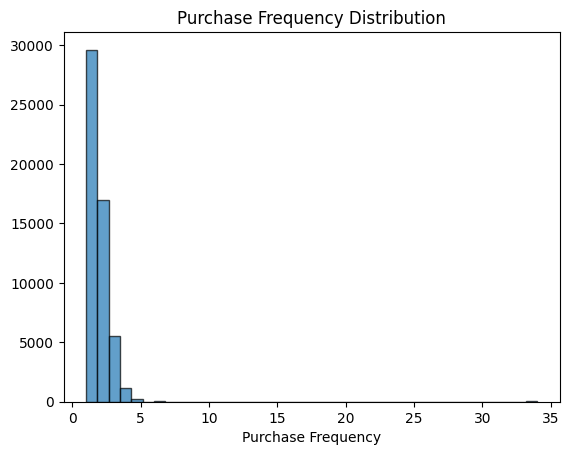

In [185]:
plt.hist(x = customerData['Purchase Frequency'] , bins = 40 , edgecolor = 'black' , alpha = 0.7)

plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.show()

In [186]:
cor = customerData[['Age' , 'Income Level' , 'Spending Score']].corr()
cor

,Age,Income Level,Spending Score
Age,1.000000,-0.003447,0.006763
Income Level,-0.003447,1.000000,-0.018015
Spending Score,0.006763,-0.018015,1.000000


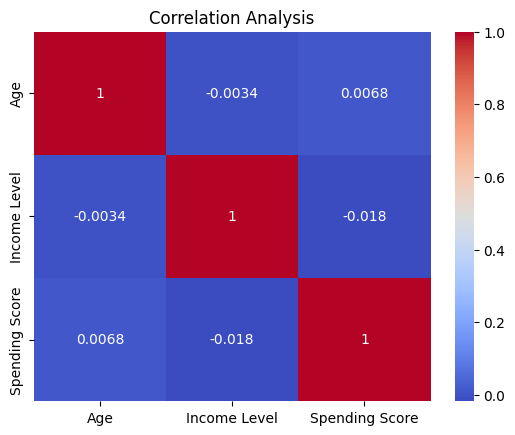

In [187]:
sns.heatmap(data= cor ,  annot = True , cmap = 'coolwarm' )
plt.title('Correlation Analysis')

plt.show()

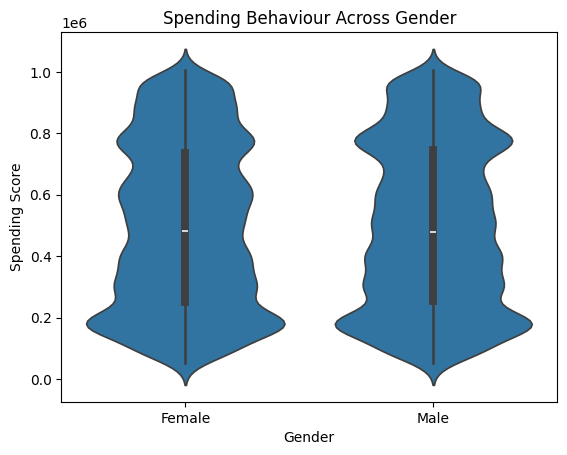

In [188]:
sns.violinplot( x = customerData['Gender'] , y = customerData['Spending Score'])
plt.title('Spending Behaviour Across Gender')

plt.show()

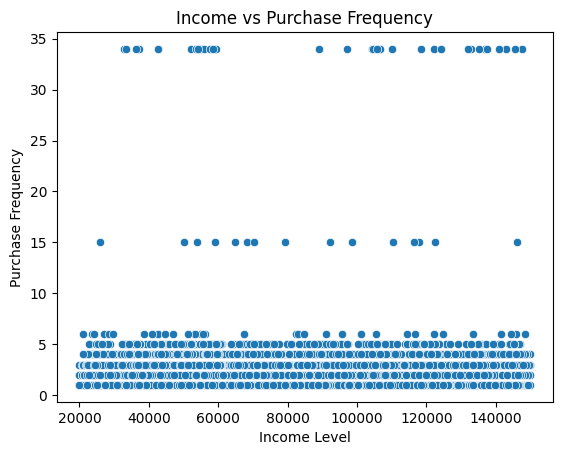

In [189]:
sns.scatterplot(x = customerData['Income Level'] , y = customerData['Purchase Frequency'] )

plt.title('Income vs Purchase Frequency')

plt.show()

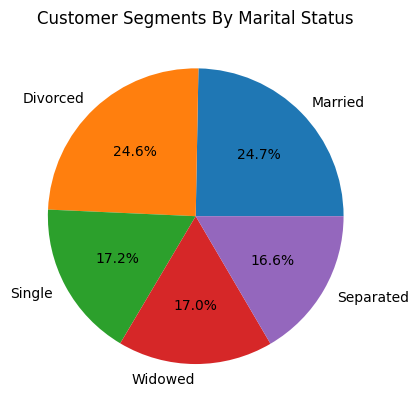

In [190]:
plt.pie(x = customerData['Marital Status'].value_counts() , autopct='%1.1f%%' , labels = customerData['Marital Status'].value_counts().keys() )

plt.title('Customer Segments By Marital Status')
plt.show()

In [191]:
ageBins = [15 , 25, 35, 45, 55, 65 , 75 ]

customerData['Age_Range'] = pd.cut(customerData['Age'], bins=ageBins)

customerData['Age_Range']

,Age_Range
0,"(15, 25]"
1,"(25, 35]"
2,"(25, 35]"
3,"(15, 25]"
4,"(15, 25]"
...,...
53498,"(25, 35]"
53499,"(55, 65]"
53500,"(15, 25]"
53501,"(35, 45]"


In [192]:
customerData['Age_Range'].isnull().sum()

0

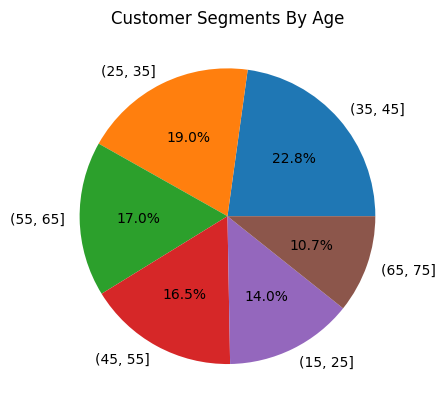

In [193]:
plt.pie(x=customerData['Age_Range'].value_counts() , labels = customerData['Age_Range'].value_counts().keys() ,autopct='%1.1f%%'  )
plt.title('Customer Segments By Age')
plt.show()

In [194]:
income = [20000, 40000, 60000, 80000, 100000, 120000, 140000 , 160000 ]

customerData['Income_Range'] = pd.cut(customerData['Income Level'], bins=income)

customerData['Income_Range']

,Income_Range
0,"(60000, 80000]"
1,"(40000, 60000]"
2,"(60000, 80000]"
3,"(60000, 80000]"
4,"(20000, 40000]"
...,...
53498,"(120000, 140000]"
53499,"(120000, 140000]"
53500,"(40000, 60000]"
53501,"(60000, 80000]"


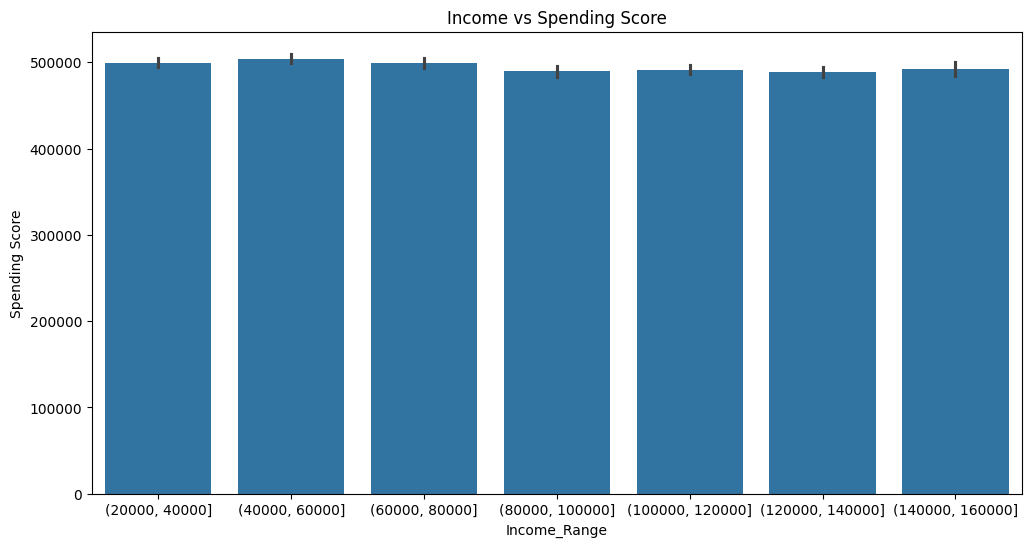

In [195]:
plt.figure(figsize= (12 , 6))

sns.barplot(x=customerData['Income_Range'] , y = customerData['Spending Score'])

plt.title('Income vs Spending Score')
plt.show()

In [196]:
customerData['Spending Score']

,Spending Score
0,369352
1,782202
2,778339
3,792157
4,367782
...,...
53498,590805
53499,639018
53500,635464
53501,734867


In [197]:
spending = [0, 100000, 200000, 300000, 400000, 500000 , 600000  , 700000 , 800000 , 900000 , 1000000 , 1100000]

customerData['Spending_Range'] = pd.cut(customerData['Spending Score'], bins= spending)

customerData['Spending_Range']

,Spending_Range
0,"(300000, 400000]"
1,"(700000, 800000]"
2,"(700000, 800000]"
3,"(700000, 800000]"
4,"(300000, 400000]"
...,...
53498,"(500000, 600000]"
53499,"(600000, 700000]"
53500,"(600000, 700000]"
53501,"(700000, 800000]"


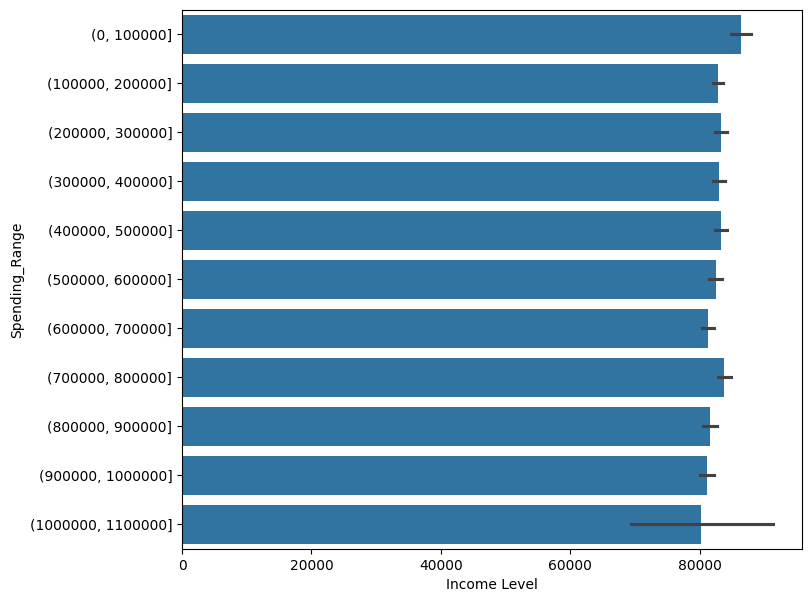

In [198]:
plt.figure(figsize= (8 , 7))
sns.barplot(y = customerData['Spending_Range'] , x = customerData['Income Level'] )

plt.show()

In [199]:
matrix = customerData[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 'Spending Score']].corr()

matrix

,Age,Income Level,Coverage Amount,Premium Amount,Spending Score
Age,1.000000,-0.003447,0.006746,0.003665,0.006763
Income Level,-0.003447,1.000000,-0.018024,0.002025,-0.018015
Coverage Amount,0.006746,-0.018024,1.000000,-0.001647,0.999989
Premium Amount,0.003665,0.002025,-0.001647,1.000000,0.003144
Spending Score,0.006763,-0.018015,0.999989,0.003144,1.000000


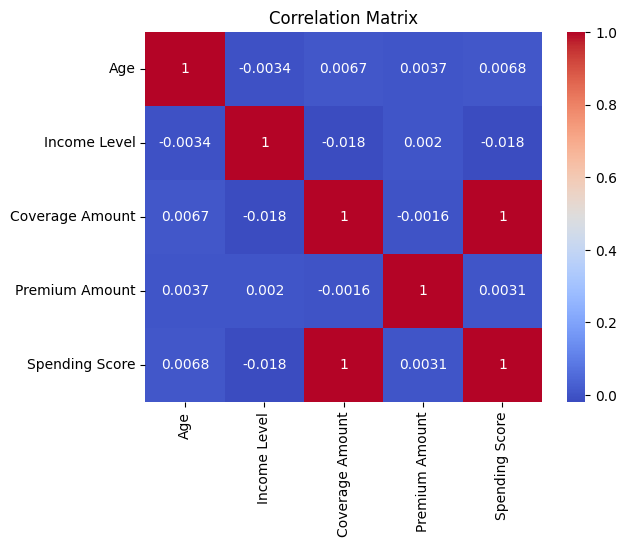

In [200]:

sns.heatmap(data = matrix , annot = True , cmap = 'coolwarm')

plt.title('Correlation Matrix')
plt.show()

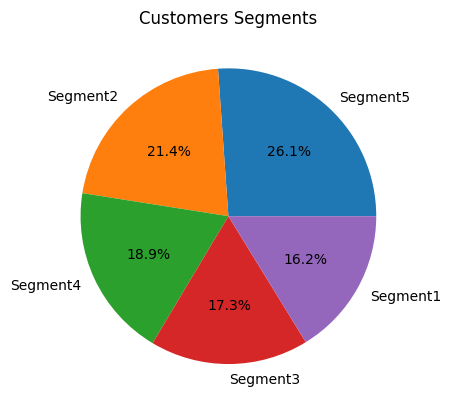

In [201]:
plt.pie(x = customerData['Segmentation Group'].value_counts()  ,  autopct='%1.1f%%' ,  labels = customerData['Segmentation Group'].value_counts().keys() )

plt.title('Customers Segments')

plt.show()

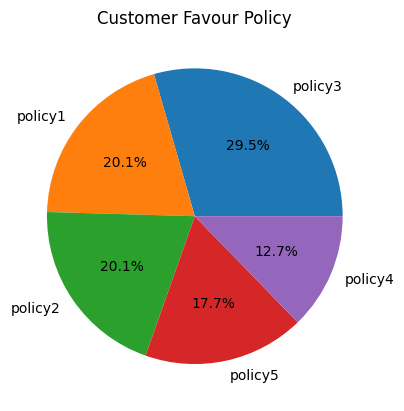

In [202]:
plt.pie(x=customerData['Behavioral Data'].value_counts()  ,  autopct='%1.1f%%' ,  labels = customerData['Behavioral Data'].value_counts().keys() )

plt.title('Customer Favour Policy')
plt.show()

In [203]:
customerData

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,...,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Spending Score,Purchase Frequency,Age_Range,Income_Range,Spending_Range
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,2018-04-10,...,Email,In-Person Meeting,Afternoon,English,Segment5,369352,1,"(15, 25]","(60000, 80000]","(300000, 400000]"
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,2018-11-06,...,Mail,In-Person Meeting,Morning,French,Segment5,782202,1,"(25, 35]","(40000, 60000]","(700000, 800000]"
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,2021-06-05,...,Email,Mail,Evening,German,Segment3,778339,2,"(25, 35]","(60000, 80000]","(700000, 800000]"
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,2018-09-02,...,Text,In-Person Meeting,Anytime,French,Segment3,792157,1,"(15, 25]","(60000, 80000]","(700000, 800000]"
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,2018-09-10,...,Email,Text,Weekends,English,Segment2,367782,4,"(15, 25]","(20000, 40000]","(300000, 400000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,2019-01-01,...,In-Person Meeting,Phone,Afternoon,German,Segment5,590805,3,"(25, 35]","(120000, 140000]","(500000, 600000]"
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,2021-05-18,...,Text,Mail,Afternoon,German,Segment1,639018,2,"(55, 65]","(120000, 140000]","(600000, 700000]"
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,2018-11-27,...,Text,Text,Weekends,French,Segment4,635464,1,"(15, 25]","(40000, 60000]","(600000, 700000]"
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,2021-06-04,...,Mail,Phone,Morning,French,Segment5,734867,1,"(35, 45]","(60000, 80000]","(700000, 800000]"


In [204]:
customerData.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Marital Status,0
Education Level,0
Geographic Information,0
Occupation,0
Income Level,0
Behavioral Data,0
Purchase History,0


In [214]:
x = customerData.drop(["Spending Score", "Age_Range" , 'Income_Range', 'Spending_Range' , 'Purchase History'], axis=1)
y = customerData["Spending Score"]

In [215]:
y

,Spending Score
0,369352
1,782202
2,778339
3,792157
4,367782
...,...
53498,590805
53499,639018
53500,635464
53501,734867


In [216]:
print(x.dtypes)

Customer ID                              int64
Age                                      int64
Gender                                  object
Marital Status                          object
Education Level                         object
Geographic Information                  object
Occupation                            category
Income Level                             int64
Behavioral Data                         object
Interactions with Customer Service    category
Insurance Products Owned                object
Coverage Amount                          int64
Premium Amount                           int64
Policy Type                           category
Customer Preferences                    object
Preferred Communication Channel       category
Preferred Contact Time                category
Preferred Language                    category
Segmentation Group                    category
Purchase Frequency                       int64
dtype: object


In [217]:
categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Occupation',
                               'Policy Type', 'Preferred Communication Channel',
                               'Preferred Contact Time', 'Segmentation Group', 'Preferred Language','Interactions with Customer Service','Geographic Information','Behavioral Data', 'Insurance Products Owned', 'Customer Preferences' ]


In [218]:
encoded = LabelEncoder()

for i in categorical_columns:
    x[i] = encoded.fit_transform(x[i])


In [219]:
print(x.dtypes)


Customer ID                           int64
Age                                   int64
Gender                                int64
Marital Status                        int64
Education Level                       int64
Geographic Information                int64
Occupation                            int64
Income Level                          int64
Behavioral Data                       int64
Interactions with Customer Service    int64
Insurance Products Owned              int64
Coverage Amount                       int64
Premium Amount                        int64
Policy Type                           int64
Customer Preferences                  int64
Preferred Communication Channel       int64
Preferred Contact Time                int64
Preferred Language                    int64
Segmentation Group                    int64
Purchase Frequency                    int64
dtype: object


In [220]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=45)

xTrain

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Purchase Frequency
18094,45245,39,1,1,3,31,7,112346,3,3,4,488098,3520,2,0,4,4,4,3,3
14909,79278,41,0,0,4,29,5,92668,1,3,1,225520,1106,2,4,0,3,2,2,1
2921,5831,66,0,1,2,24,4,57888,0,3,0,327764,3622,0,2,4,2,1,1,1
24780,45145,68,0,3,0,13,7,136259,4,4,2,324326,1681,0,0,1,1,2,2,3
21696,71799,68,1,3,1,33,3,132923,2,0,3,434913,2045,2,2,3,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32469,96982,39,0,3,0,13,6,95233,0,0,1,573586,3852,1,4,4,4,4,0,2
16317,88966,52,1,0,1,20,1,144550,1,3,2,597650,2104,2,3,1,2,1,1,2
12895,47906,37,0,1,1,9,5,106978,0,0,2,676604,3386,1,2,3,3,1,4,1
6012,33545,37,1,0,1,22,1,119918,1,0,3,200173,2568,1,0,0,0,1,0,1


In [221]:
yTrain

,Spending Score
18094,491618
14909,226626
2921,331386
24780,326007
21696,436958
...,...
32469,577438
16317,599754
12895,679990
6012,202741


In [223]:
model = RandomForestRegressor(n_estimators=100, random_state=50)


model.fit(xTrain, yTrain)


RandomForestRegressor(random_state=50)

In [224]:
prediction = model.predict(xTest)

prediction

array([975619.08, 444154.49, 787303.14, ..., 765978.45, 558981.14,
       187129.03])

In [225]:
yTest

,Spending Score
33882,975419
8461,444329
7683,787270
9660,483194
5334,392934
...,...
11403,194725
30986,138986
17645,765922
41968,558880


In [226]:
mae = mean_absolute_error(yTest, prediction)
mse = mean_squared_error(yTest, prediction)
squared = r2_score(yTest, prediction)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", squared)


Mean Absolute Error: 169.78072329688814
Mean Squared Error: 54686.92001891415
R-squared: 0.9999992382816209
